In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns #6-09-2022

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("concrete.csv")
df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [6]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [7]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [8]:
df.describe(include='all')

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
df.shape

(1030, 9)

In [10]:
# For duplicates
# Checking Duplicates
duplicate = df.duplicated()
duplicate.sum()

25

In [11]:
df[duplicate]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [12]:
# Now from above we'r going 2drop the duplicate data from the ds
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(1005, 9)

In [14]:
df.head(15)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [15]:
# replacing the 0 values of columns to mean or median
df['slag'].replace(0, df['slag'].median(), inplace=True)

In [16]:

df['superplastic'].replace(0, df['superplastic'].median(), inplace=True)


In [17]:
#df['ash'].replace(np.nan, df['ash'].median(), inplace=True)

In [18]:
df.head(15)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,6.1,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,20.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,6.1,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,20.0,0.0,192.0,6.1,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,6.1,975.6,692.6,7,15.75
7,251.4,20.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,20.0,0.0,192.0,6.1,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


<AxesSubplot:>

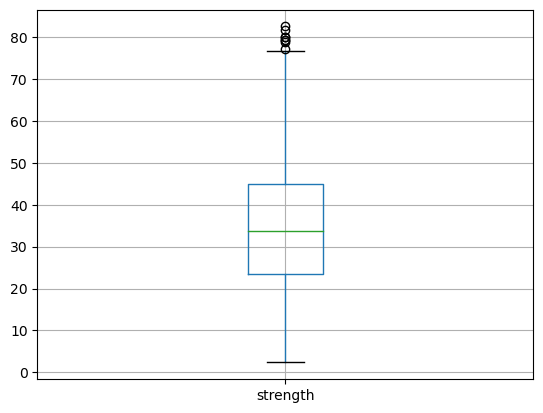

In [19]:
# Checking and removing the outliers using boxplot
df.boxplot(column='strength')

In [20]:
# Function for removing the outliers from 1column
def remove_outliers(col):
    sorted(col)
    q1, q3 = col.quantile([0.25,0.75])
    iqr = q3-q1
    lower_range = q1-(1.5*iqr)
    upper_range = q3+(1.5*iqr)
    col = np.where(col>upper_range, upper_range, col)
    col = np.where(col<lower_range, lower_range, col)
    return col

In [21]:
columns = ['slag', 'superplastic', 'fineagg', 'age', 'strength']
for colm in columns:
    df[colm] = remove_outliers(df[colm])

<AxesSubplot:>

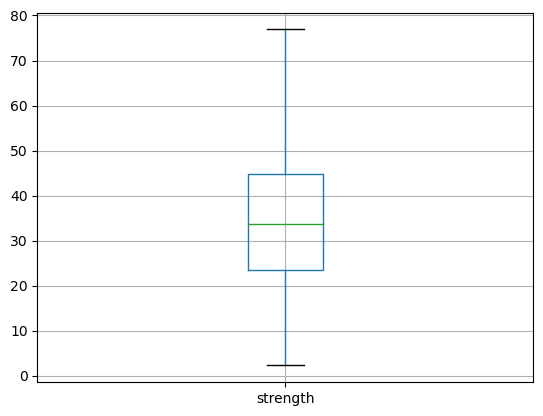

In [22]:
df.boxplot(column='strength')

In [23]:
# Dividing X & y
X = df.drop(['strength'], axis =1)
y = df[['strength']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [26]:
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
lr.score(X_train, y_train)

0.729640501030181

In [28]:
lr.score(X_test, y_test)

0.6742399810480615

In [29]:
# Polynomial model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)

X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train2, y_train)

poly_clf.score(X_train2, y_train)

0.7511492221779237

In [30]:
poly_clf.score(X_test2, y_test)

0.60053878470512

In [31]:
# tree --> DecisionTree below
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion="friedman_mse", max_depth= 4)

In [32]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4)

In [33]:
dtr.score(X_train, y_train)

0.7298379633433629

In [34]:
dtr.score(X_test, y_test)

0.6920411070421152

In [35]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=150, max_depth=4)

In [36]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=150)

In [37]:
rfr.score(X_train, y_train)

0.8122749662823301

In [38]:
rfr.score(X_test, y_test)

0.7544684370200587

In [39]:
#SVR
from sklearn.svm import SVR
svr = SVR(kernel='linear', gamma='auto')

In [40]:
svr.fit(X_train, y_train)

SVR(gamma='auto', kernel='linear')

In [41]:
svr.score(X_train, y_train)

0.7264007930797125

In [42]:
svr.score(X_test, y_test)

0.6665715615799643

In [43]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=10)

In [44]:
knnr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [45]:
knnr.score(X_train, y_train)

0.7118206728418166

In [46]:
knnr.score(X_test, y_test)

0.6111961594152824

In [47]:
from sklearn.ensemble import BaggingRegressor
bgr = BaggingRegressor(n_estimators=4)

In [48]:
bgr.fit(X_train, y_train)

BaggingRegressor(n_estimators=4)

In [49]:
bgr.score(X_train, y_train)

0.9723084174878335

In [50]:
bgr.score(X_test, y_test)

0.8518422551139223

In [51]:
# Gradient boosting

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(criterion='mse')

In [52]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse')

In [53]:
gbr.score(X_train, y_train)

0.9511531314306699

In [54]:
gbr.score(X_test, y_test)

0.880822724301979

#### K-NN With Crossvalidation 

In [55]:
# For K_NN Model we need to do Standard Scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.31679229,  1.67078748, -0.86537497, ..., -0.03323163,
        -0.30090333, -0.28110484],
       [-1.05215156, -0.49981685,  1.07148566, ...,  1.37247522,
         0.2953757 , -0.67167859],
       [-0.2745297 , -0.78360611,  0.62583631, ..., -0.22538789,
         1.10791525, -0.28110484],
       ...,
       [-0.02139508,  0.44359068,  0.54169273, ..., -1.34479482,
        -0.05339128, -0.28110484],
       [ 0.60760608, -0.55350671, -0.86537497, ..., -0.54650808,
        -1.2822011 ,  2.55055486],
       [ 2.50611568, -0.78360611, -0.86537497, ...,  1.9424958 ,
        -1.99473579, -0.86696547]])

In [56]:
X_train, Y_train, X_test, Y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [57]:
X_train

array([[-0.4298623 , -0.78360611,  0.60869596, ..., -0.35306218,
         0.99540978,  0.50004266],
       [-1.08954645,  0.60338193,  1.1930264 , ...,  0.40524574,
        -0.32465449,  1.72756017],
       [ 2.42269632, -0.78360611, -0.86537497, ..., -1.57692989,
         1.51418503,  0.50004266],
       ...,
       [-0.3943851 ,  1.99676162, -0.86537497, ..., -0.54650808,
        -2.23224735,  2.55055486],
       [-0.22658754, -0.78360611, -0.86537497, ..., -1.09073587,
         2.15546625, -0.97855797],
       [ 0.32954154, -0.78360611,  0.89540743, ...,  0.35623944,
        -1.04468954, -0.28110484]])

In [58]:
Y_train

array([[ 1.03908553, -0.78360611,  0.59934667, ..., -0.46912972,
         0.90540539, -0.86696547],
       [-1.00516824,  0.1546881 ,  1.62621003, ...,  0.42330069,
        -0.32465449, -0.67167859],
       [ 0.27201095, -0.78360611, -0.86537497, ..., -0.08223793,
         0.49288531,  2.55055486],
       ...,
       [-1.01859205, -0.86541923,  1.82098684, ...,  0.41169393,
         1.04791233,  0.50004266],
       [-0.26110589, -0.78360611,  0.97799279, ...,  0.69670422,
        -0.18589773,  0.50004266],
       [ 0.20297423, -0.78360611,  1.00136601, ..., -1.24033403,
        -0.56216605, -0.28110484]])

In [59]:
X_test

,strength
554,27.66
446,55.02
838,58.80
401,39.36
983,32.01
...,...
106,9.74
270,55.16
878,38.41
439,8.20


In [60]:
Y_test

,strength
949,41.67
644,29.55
696,34.49
523,14.54
367,17.34
...,...
594,36.45
959,44.39
372,35.85
7,36.64


In [94]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
neighbors = list(range(1,100,2))
cv_scores = []
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=10)
    cv_scores.append(scores.mean())

In [95]:
scores

array([0.51740071, 0.48697053, 0.60761447, 0.46522265, 0.38444685,
       0.50977147, 0.53884458, 0.48905675, 0.48369661, 0.45246324])

In [96]:
MSE = [1-x for x in cv_scores]
MSE

[0.2759081766173901,
 0.25048811662881465,
 0.25622837681514166,
 0.2598024425964185,
 0.27763571127527975,
 0.2931567479575429,
 0.3080650606400478,
 0.3174525281296987,
 0.3214555898163194,
 0.3290776800380225,
 0.33697122529327594,
 0.34273402918966656,
 0.35281129916928566,
 0.3616582246143414,
 0.3677044125135849,
 0.3751246255005982,
 0.38065790845077496,
 0.3852643360367487,
 0.3896149466410487,
 0.39409711303153727,
 0.40127040248175416,
 0.4086370071676235,
 0.4153900187135853,
 0.4199294877509505,
 0.4260538611800525,
 0.43224635090758734,
 0.4367427682010663,
 0.44104432786869097,
 0.4443415506085697,
 0.4493144571449701,
 0.4525390805394848,
 0.455724800315505,
 0.45833758137919856,
 0.46251951903282273,
 0.46641032740177923,
 0.46958921916811813,
 0.47141487060951026,
 0.47334871032160974,
 0.47612619737379824,
 0.47960297602589974,
 0.4837061291264497,
 0.4858157345353915,
 0.4894083409901806,
 0.49330210615694214,
 0.4956645681781937,
 0.49843119712545103,
 0.50004998091

In [101]:
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
optimal_k

3

Text(0, 0.5, 'Error')

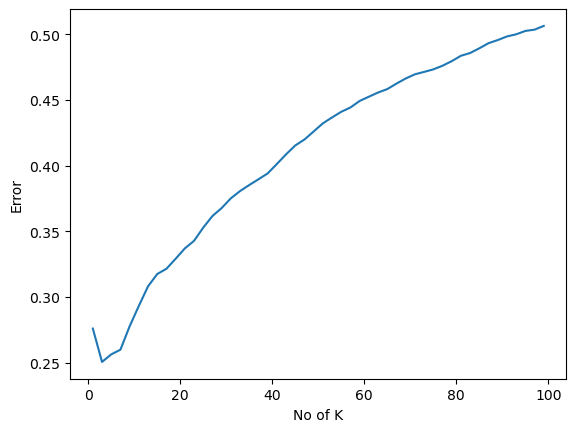

In [102]:
import matplotlib.pyplot as plt
plt.plot(neighbors, MSE)
plt.xlabel('No of K')
plt.ylabel('Error')